# Regularization!

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
from scipy.signal import sawtooth
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [ ]:
def linear_model(A, ys):
  u, s, vT = numpy.linalg.svd(A)
  u = u[:,:A.shape[1]]
  s_inv = numpy.diag(numpy.power(s, -1))
  uT = numpy.transpose(u)
  v = numpy.transpose(vT)
  pinv = numpy.dot(v, numpy.dot(s_inv, uT))
  coefs = numpy.dot(pinv, ys)
  return coefs

def linear_model_trunc(A, ys):
  u, s, vT = numpy.linalg.svd(A)
  s_trunc = s[s > 0.1/s.max()]
  s_inv = numpy.diag(numpy.power(s_trunc, -1))
  uT = numpy.transpose(u)[:s_trunc.shape[0], :]
  v = numpy.transpose(vT)[:, :s_trunc.shape[0]]
  pinv = numpy.dot(v, numpy.dot(s_inv, uT))
  coefs = numpy.dot(pinv, ys)
  return coefs

def linear_model_ridge(A, ys, lmbda):
  u, s, vT = numpy.linalg.svd(A)
  s_inv = numpy.diag(ridge_regularizer(s, lmbda))
  u = u[:,:A.shape[1]]
  uT = numpy.transpose(u)
  v = numpy.transpose(vT)
  pinv = numpy.dot(v, numpy.dot(s_inv, uT))
  coefs = numpy.dot(pinv, ys)
  return coefs

def generate_periodic_data(period, amplitude, range, noise_scale, size, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size=size)
  ys = amplitude*sawtooth(sample * 2*numpy.pi/period - 1.47)
  noise = rng.normal(loc=0, scale=noise_scale, size=ys.shape)
  return (sample, ys + noise)

def ridge_regularizer(x, lmbda):
  return 1/(x + lmbda)

# A Small Example

In [ ]:
A = numpy.array([[1, 2], [3,6], [-2, -4]])
ys = numpy.array([1, 2, 3])
u,s,vT = numpy.linalg.svd(A)

In [ ]:
s

array([8.36660027e+00, 8.88178420e-16])

In [ ]:
s_inv = numpy.diag(numpy.power(s, -1))
s_inv

array([[1.19522861e-01, 0.00000000e+00],
       [0.00000000e+00, 1.12589991e+15]])

In [ ]:
u = u[:,:A.shape[1]]
v = numpy.transpose(vT)
uT = numpy.transpose(u)

pinv = numpy.dot(v, numpy.dot(s_inv, uT))
pinv

array([[-9.62910104e+14,  2.91496172e+14, -4.42107938e+13],
       [ 4.81455052e+14, -1.45748086e+14,  2.21053969e+13]])

In [ ]:
linear_model(A, ys)

array([-5.12550141e+14,  2.56275070e+14])

In [ ]:
coefs = linear_model_trunc(A, ys)

In [ ]:
numpy.dot(A,coefs)

array([ 0.07142857,  0.21428571, -0.14285714])

# A Bigger Example

In [ ]:
period = 5
amplitude = 10
eff_range = [-10,10]
xs, ys = generate_periodic_data(period, amplitude, eff_range, 2, (1000, 1), 8675309)

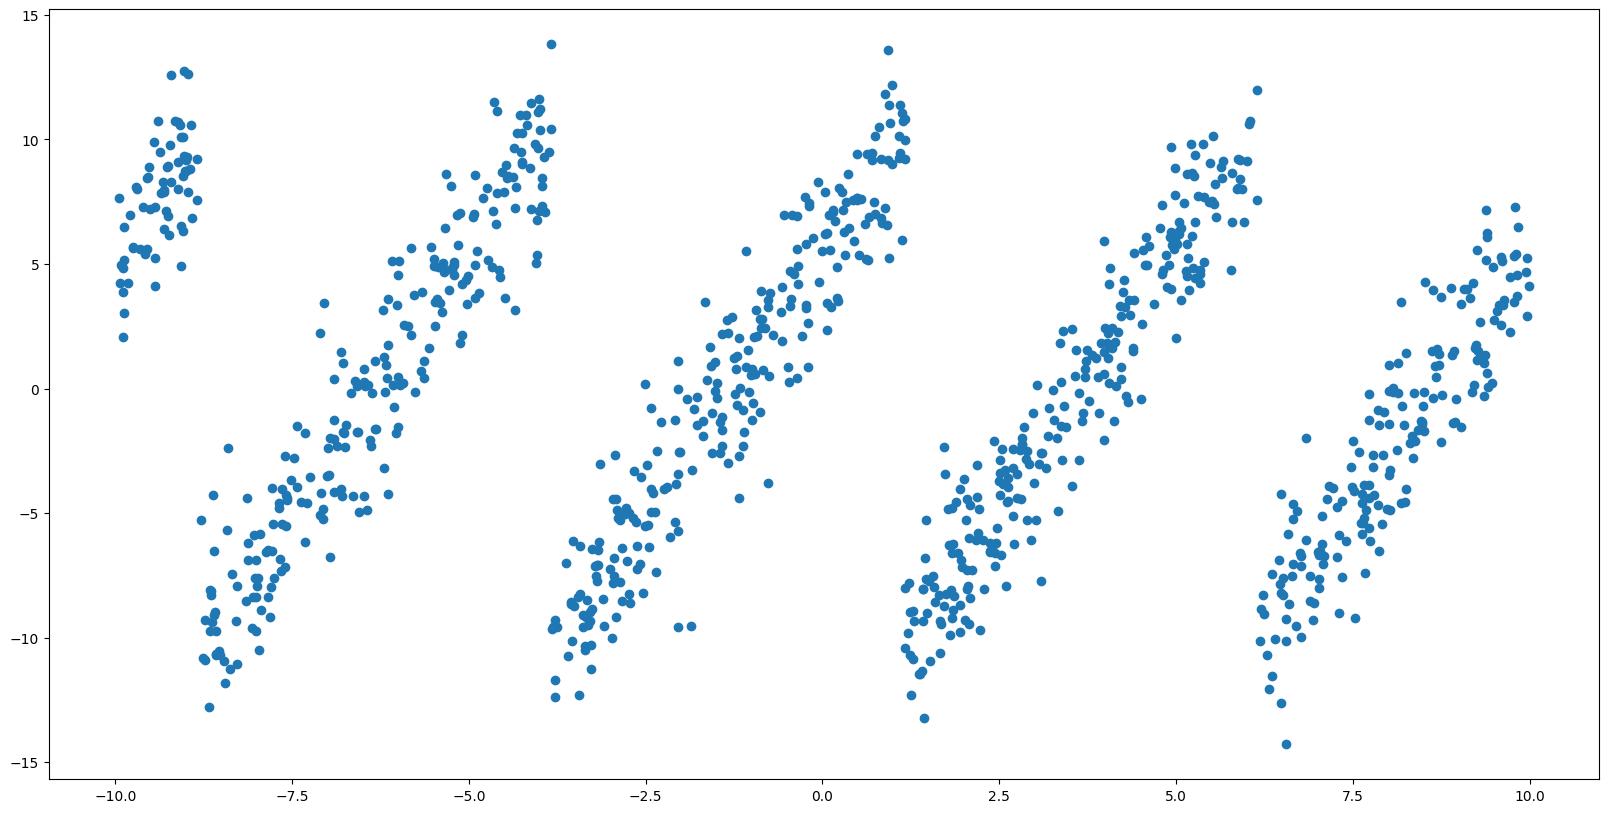

In [ ]:
plt.scatter(xs, ys)

In [ ]:
parameters = 10
cosines = numpy.hstack([numpy.cos(2*numpy.pi*xs*n/period) for n in range(-1*parameters,parameters, 1)])
sines = numpy.hstack([numpy.sin(xs*2*numpy.pi*n/period) for n in range(1,parameters)])
neg_sines = numpy.hstack([numpy.sin(xs*2*numpy.pi*n/period) for n in range(-1*parameters,-1, 1)])
A = numpy.hstack([cosines, sines, neg_sines])

In [ ]:
coefs = linear_model(A, ys)
preds = numpy.dot(A, coefs)
errors = ys - preds

In [ ]:
coefs.shape

(38, 1)

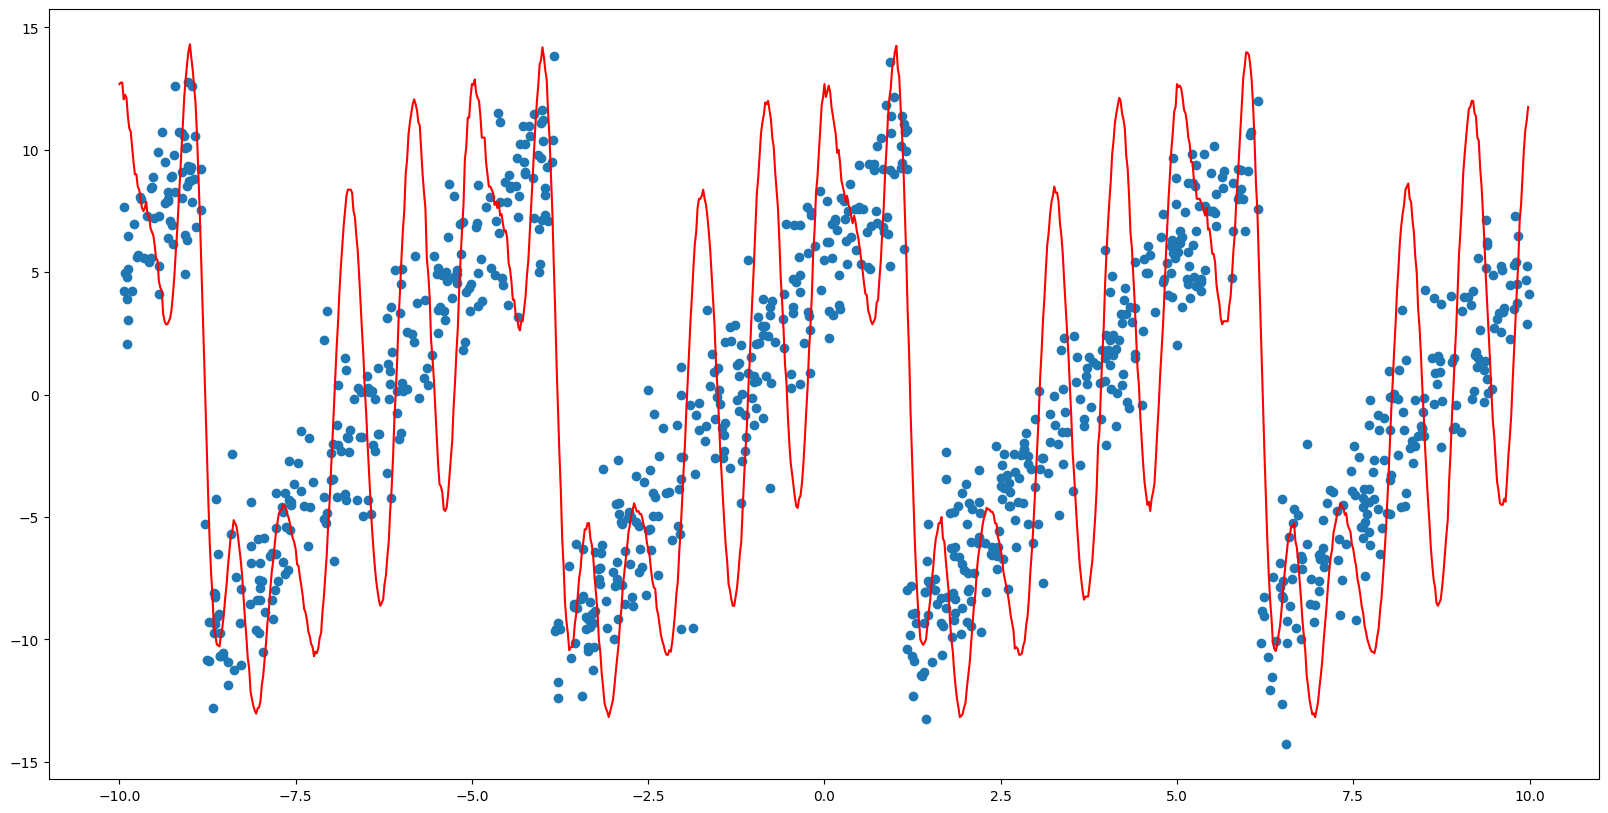

In [ ]:
coefs = numpy.reshape(coefs, (-1,1))
t = numpy.arange(eff_range[0], eff_range[1], (eff_range[1] - eff_range[0])/1000)
cosine_preds = numpy.dot(coefs[:2*parameters, 0],numpy.array([numpy.cos(n*2*numpy.pi*t/period) for n in range(-1*parameters,parameters)]))
sine_preds = numpy.dot(coefs[2*parameters:3*parameters-1, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(1,parameters)]))
neg_sines_preds = numpy.dot(coefs[3*parameters-1:, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(-1*parameters,-1)]))
prediction = cosine_preds + sine_preds + neg_sines_preds
plt.scatter(xs,ys)
plt.plot(t, prediction, color='red')
plt.show()

In [ ]:
coefs = linear_model_trunc(A, ys)
preds = numpy.dot(A, coefs)
errors = ys - preds

In [ ]:
coefs

array([[ 0.4274072 ],
       [ 0.16358659],
       [-0.26358057],
       [-0.38890044],
       [ 0.28437423],
       [ 0.50154298],
       [-0.30919684],
       [-0.95694277],
       [ 0.32723476],
       [ 3.25439983],
       [-0.01472958],
       [ 3.25439983],
       [ 0.32723476],
       [-0.95694277],
       [-0.30919684],
       [ 0.50154298],
       [ 0.28437423],
       [-0.38890044],
       [-0.26358057],
       [ 0.16358659],
       [-0.68161622],
       [ 1.57478874],
       [ 0.25817786],
       [-0.74027915],
       [-0.33773195],
       [ 0.3918073 ],
       [ 0.21671855],
       [-0.28277392],
       [-0.23439051],
       [-0.36987527],
       [ 0.23439051],
       [ 0.28277392],
       [-0.21671855],
       [-0.3918073 ],
       [ 0.33773195],
       [ 0.74027915],
       [-0.25817786],
       [-1.57478874]])

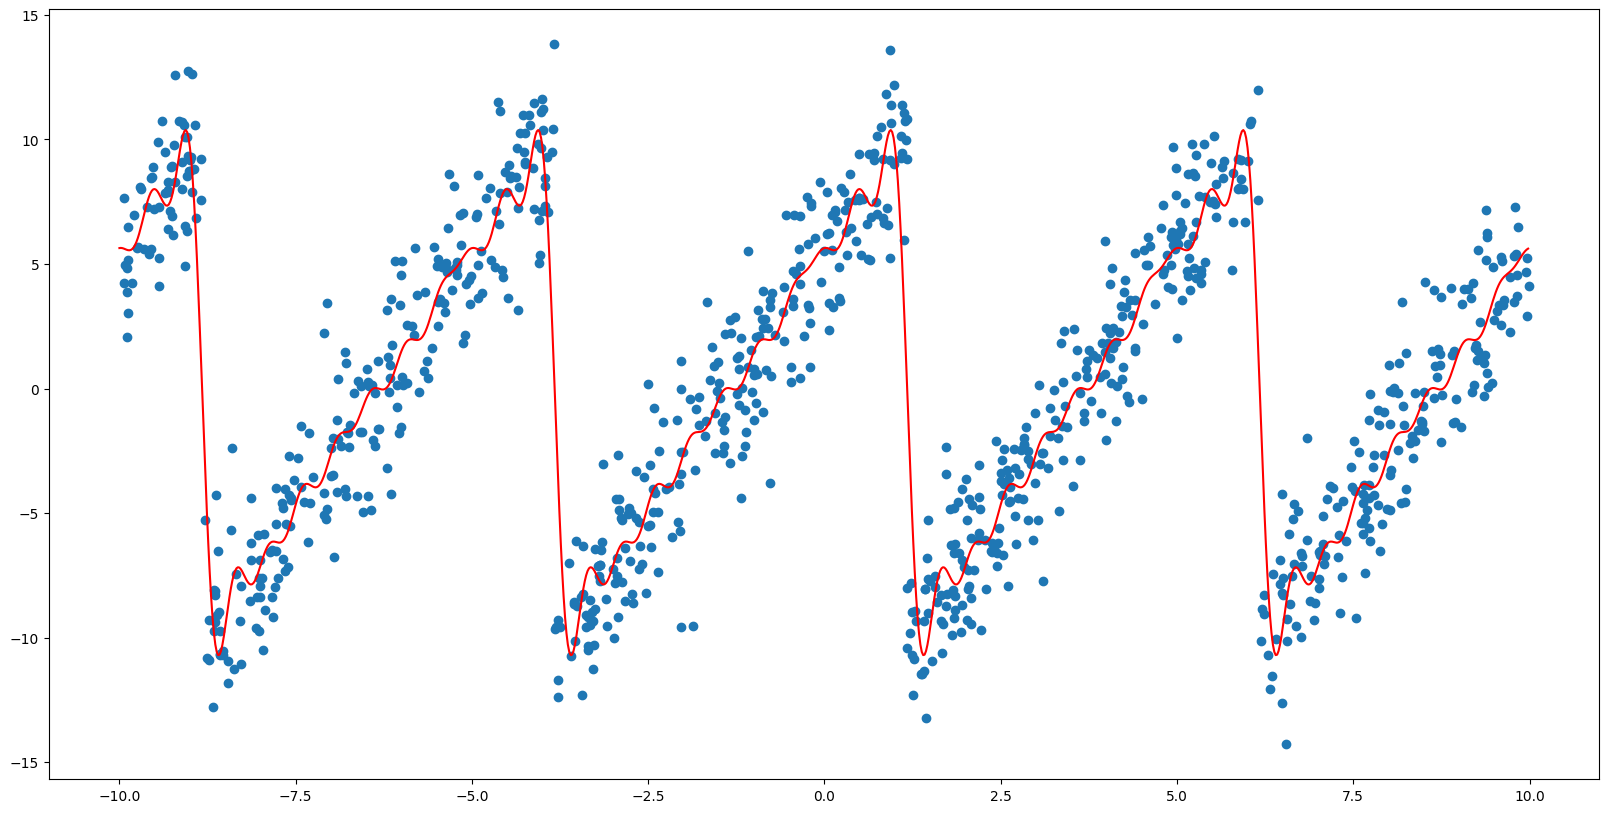

In [ ]:
coefs = numpy.reshape(coefs, (-1,1))
t = numpy.arange(eff_range[0], eff_range[1], (eff_range[1] - eff_range[0])/1000)
cosine_preds = numpy.dot(coefs[:2*parameters, 0],numpy.array([numpy.cos(n*2*numpy.pi*t/period) for n in range(-1*parameters,parameters)]))
sine_preds = numpy.dot(coefs[2*parameters:3*parameters-1, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(1,parameters)]))
neg_sines_preds = numpy.dot(coefs[3*parameters-1:, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(-1*parameters,-1)]))
prediction = cosine_preds + sine_preds + neg_sines_preds
plt.scatter(xs,ys)
plt.plot(t, prediction, color='red')
plt.show()

# Ridge Regression
Unregularized linear regression looks to minimize:
$$
\mbox{argmin}_{\beta} \|\mathbf{y} - A\beta\|_2^2
$$

With ridge regularization, we add and extra term:
$$
\mbox{argmin}_{\beta} \|\mathbf{y} - A\beta\|_2^2 + \lambda \|\beta\|_2^2
$$
(Page 63 of ESL)

In [ ]:
coefs = linear_model_ridge(A, ys, 3.5)
preds = numpy.dot(A, coefs)
errors = ys - preds

In [ ]:
coefs

array([[ 0.36584864],
       [-0.45537769],
       [ 0.02819396],
       [-0.03511647],
       [-0.21032913],
       [-0.01299451],
       [-0.4830583 ],
       [-0.64730164],
       [ 0.3467932 ],
       [ 3.72055475],
       [-0.01353924],
       [ 2.14227318],
       [ 0.23478193],
       [-1.08652982],
       [-0.06163498],
       [ 0.92879938],
       [ 0.73149095],
       [-0.66937691],
       [-0.510954  ],
       [ 0.75685242],
       [-0.58871397],
       [ 1.76757535],
       [ 0.28628084],
       [-0.96631263],
       [ 0.56891175],
       [ 0.86750172],
       [ 0.02477975],
       [-0.34797653],
       [-0.13582835],
       [-0.31477328],
       [ 0.28085431],
       [ 0.16396576],
       [-0.374845  ],
       [ 0.15481552],
       [ 1.17163858],
       [ 0.37220616],
       [-0.1700613 ],
       [-1.083172  ]])

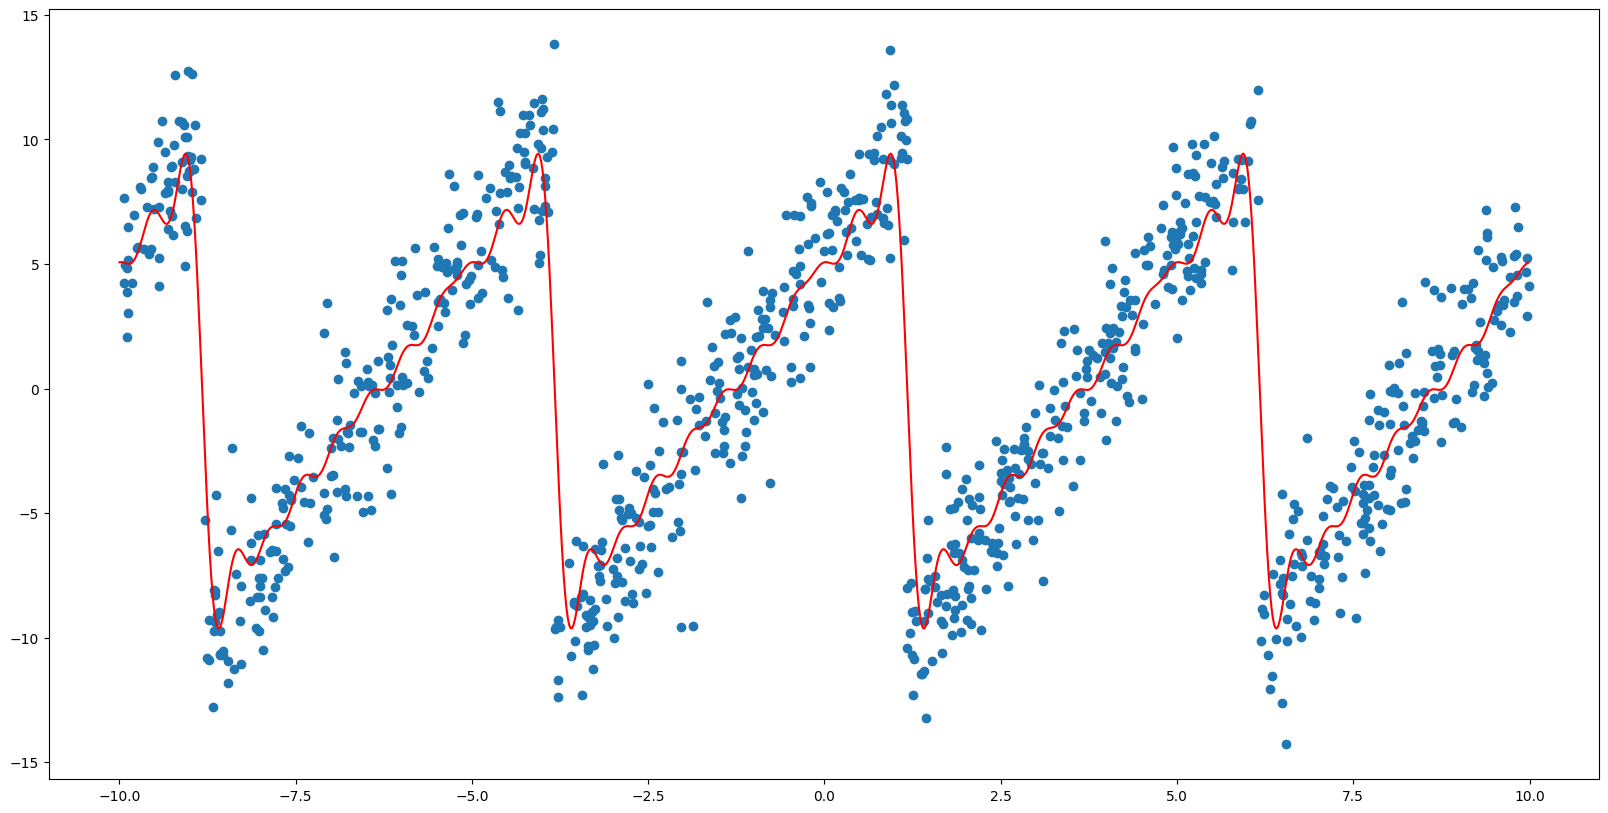

In [ ]:
coefs = numpy.reshape(coefs, (-1,1))
t = numpy.arange(eff_range[0], eff_range[1], (eff_range[1] - eff_range[0])/1000)
cosine_preds = numpy.dot(coefs[:2*parameters, 0],numpy.array([numpy.cos(n*2*numpy.pi*t/period) for n in range(-1*parameters,parameters)]))
sine_preds = numpy.dot(coefs[2*parameters:3*parameters-1, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(1,parameters)]))
neg_sines_preds = numpy.dot(coefs[3*parameters-1:, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(-1*parameters,-1)]))
prediction = cosine_preds + sine_preds + neg_sines_preds
plt.scatter(xs,ys)
plt.plot(t, prediction, color='red')
plt.show()

# LASSO Regression
$$
\mbox{argmin}_{\beta} \|\mathbf{y} - A\beta\|_2^2 + \lambda \|\beta\|_1
$$

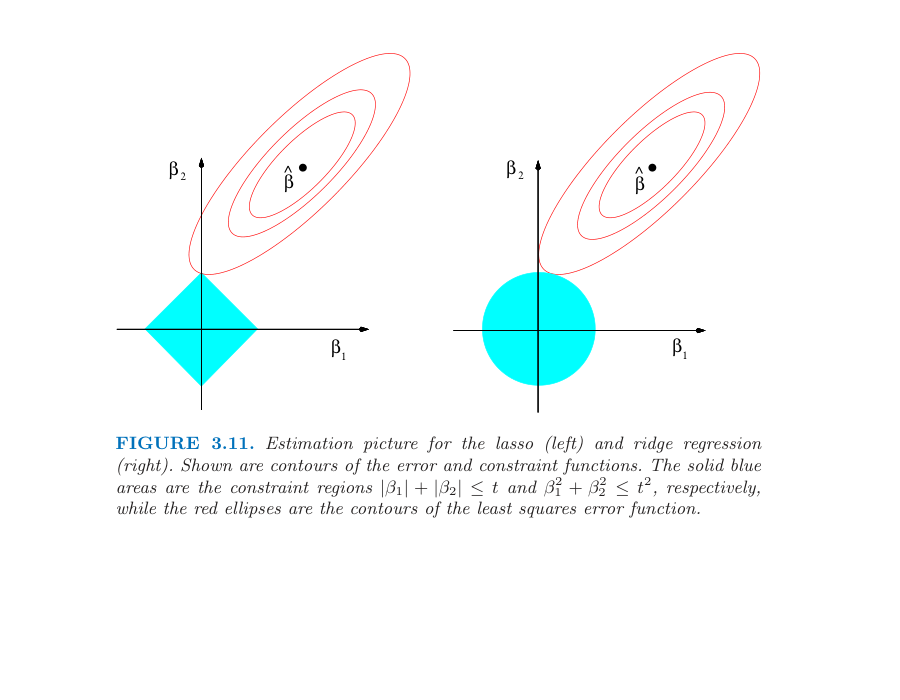

In [ ]:
q